<a href="https://colab.research.google.com/github/Tejatrix/Tejatrix/blob/main/BinaryClassification_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

dataset = pd.read_excel('/content/drive/MyDrive/churndata.xlsx')

# Exploratory Data Analysis 

In [7]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataset.shape

(10000, 14)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The columns Surname, Geography, Gender are already defined as "Objects".  
But we will only consider Geography, Gender as features for modelling


#  One hot encoding
Generating dummy matrices

In [11]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:

gender_dummies = pd.get_dummies(dataset.Gender)
geo_dummies = pd.get_dummies(dataset.Geography)

#
Merging with the data

In [13]:
dataset = pd.concat([dataset,gender_dummies,geo_dummies],axis='columns')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


#
Dropping the unnecessary columns

In [14]:
dataset = dataset.drop(['Gender','CustomerId','Surname','Male','Geography','Germany','RowNumber'],axis = 1)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,France,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,0,0


In [15]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,France,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.501400,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.500023,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


EDA Plots

In [16]:
# Pairwise plot to find any anomolies.
data_stats = dataset.describe()
data_stats.pop('Exited')

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

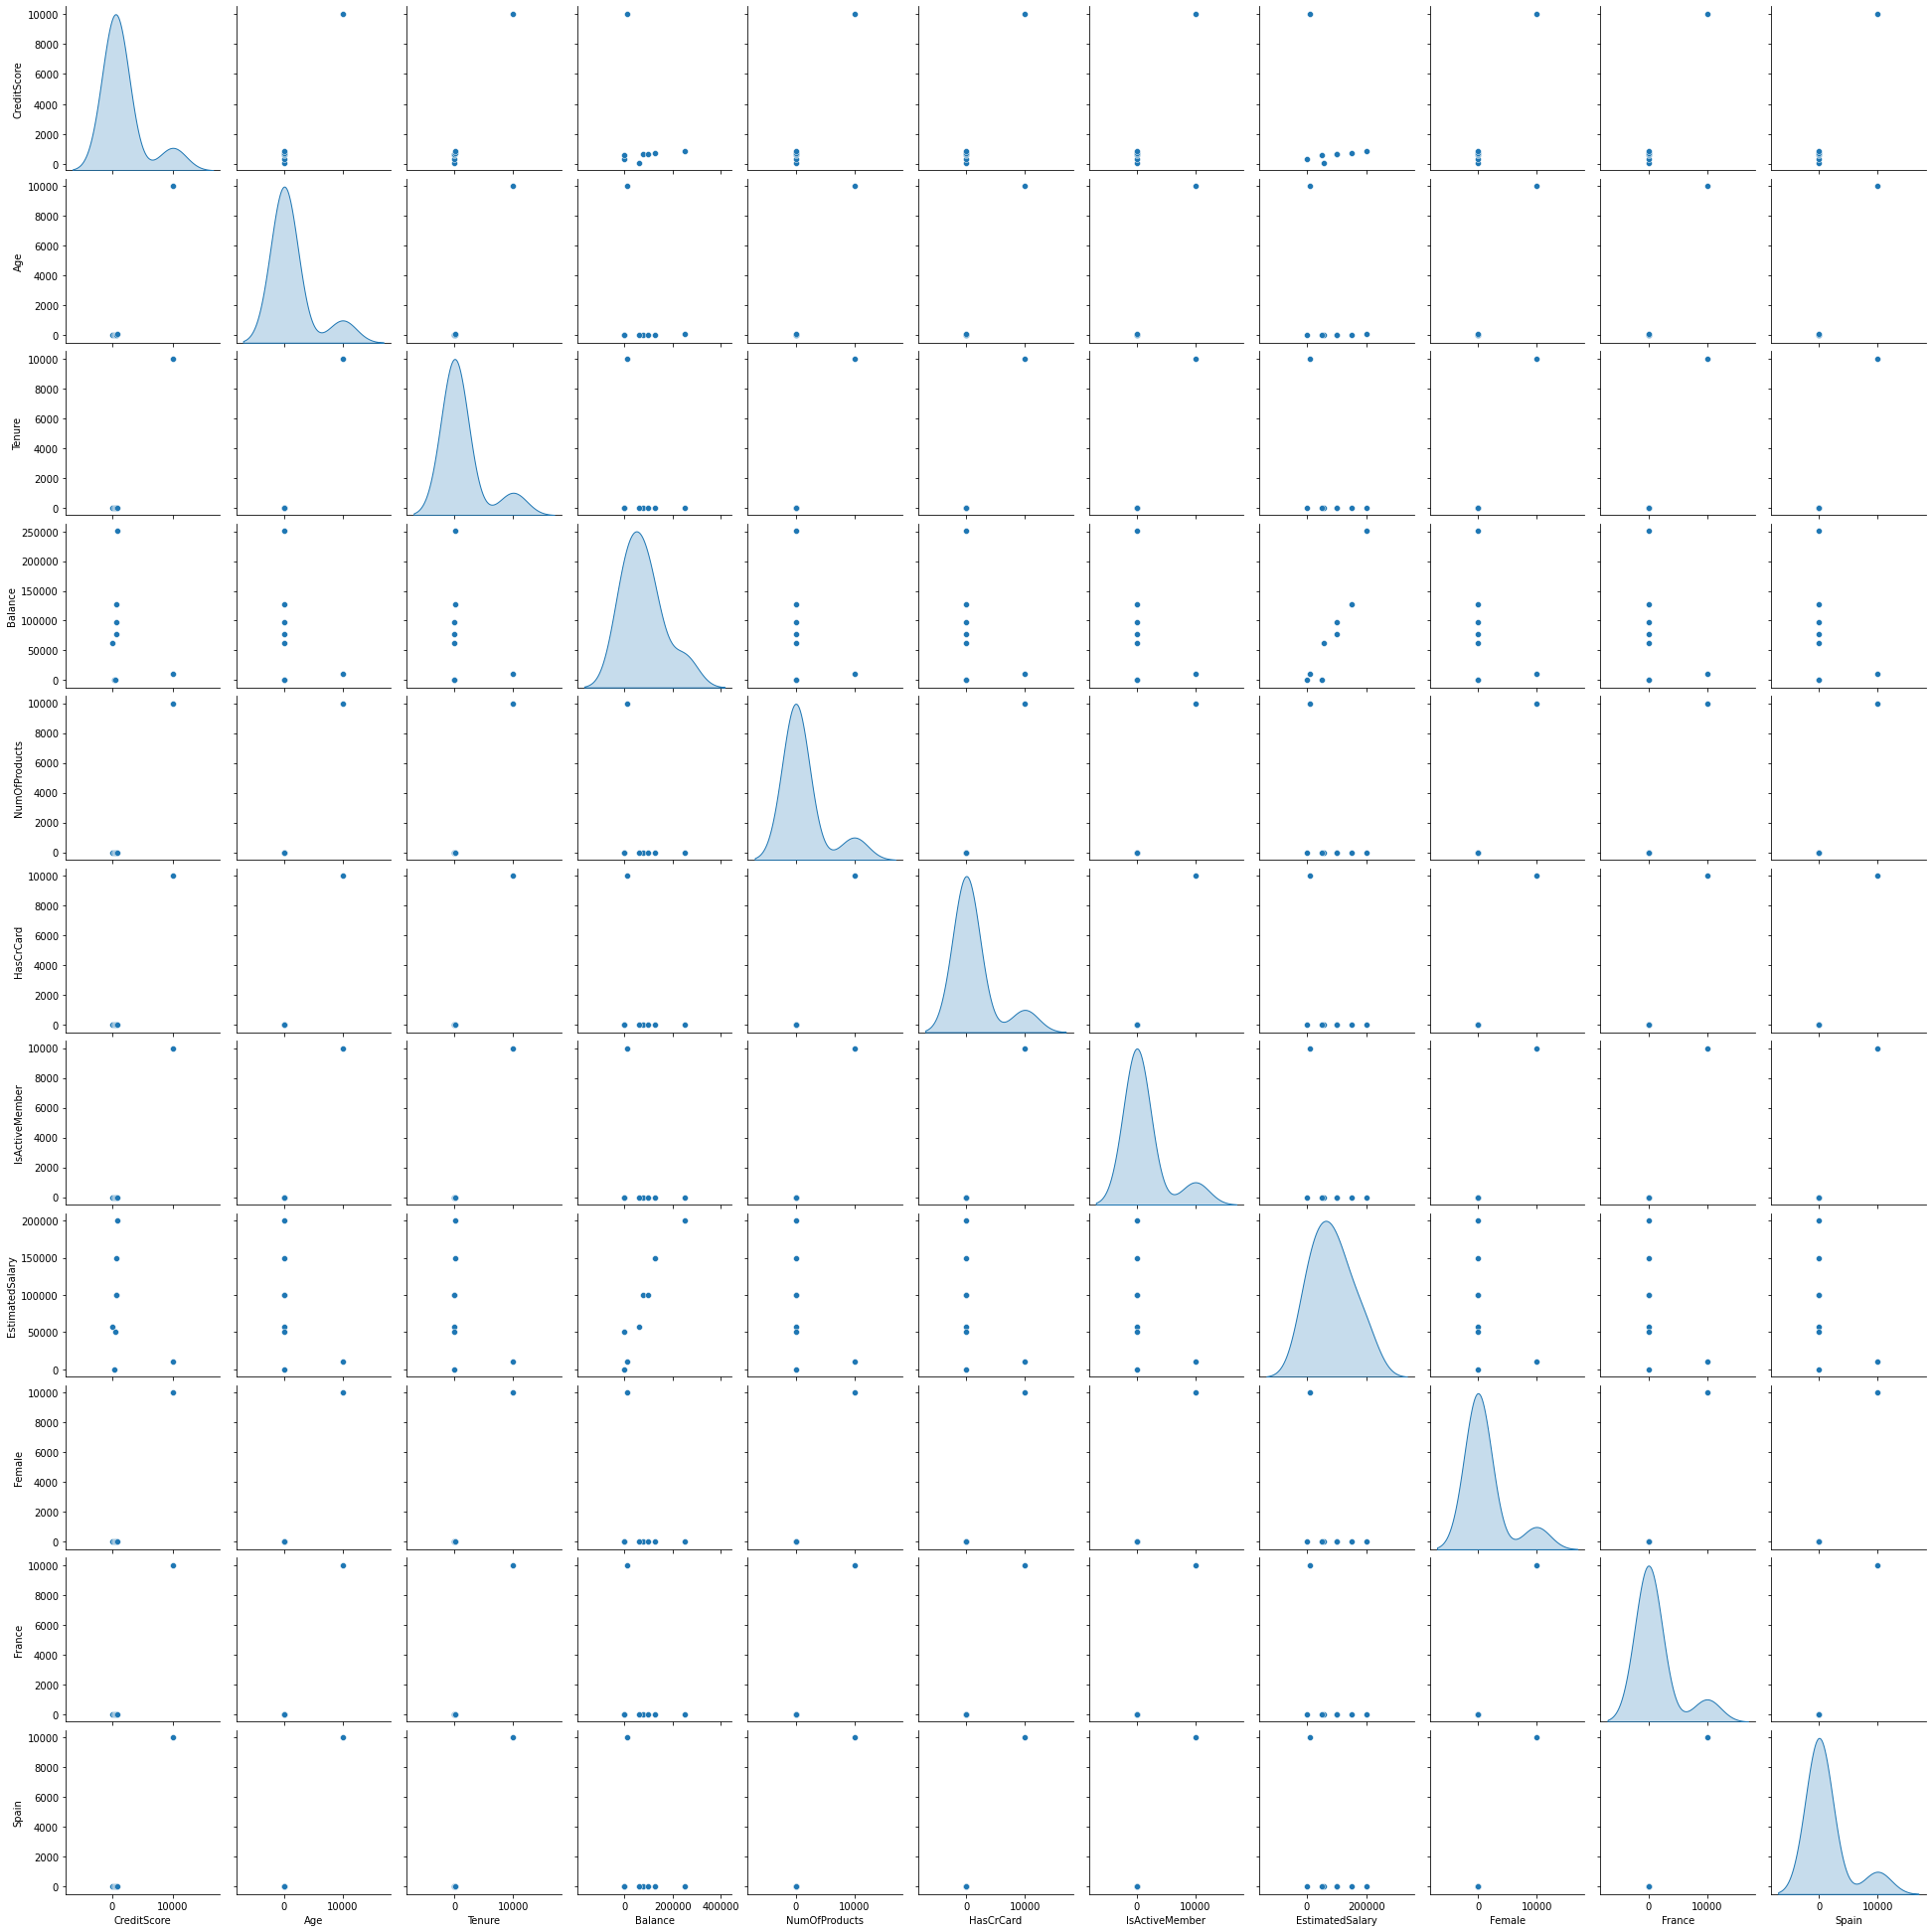

In [36]:
sns.pairplot(data_stats[data_stats.columns], diag_kind = "kde")

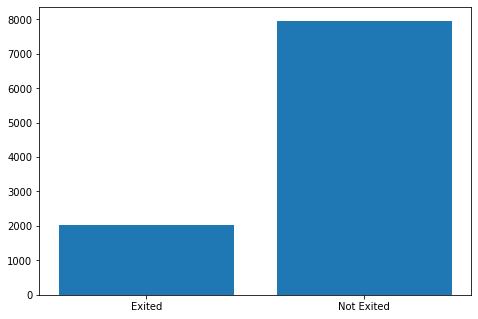

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabs = ['Exited','Not Exited']
heights = [len(dataset[dataset['Exited']==1]),len(dataset[dataset['Exited']==0])]
ax.bar(xlabs,heights)
plt.show()

#  We have to identify if the cutomer has exited or not. Hence it is a binary classification problem.

# -----------------------------------------------------------------------------------------------------------

# test-train split

The "Exited" column is un-evenly distrbuted ( 80-20 approximate ). Hence it is better to do a Strstified sampling for test train split

In [18]:
data_e1 = dataset[dataset['Exited']==1]
data_e0 = dataset[dataset['Exited']==0]

In [19]:
X1=data_e1[['CreditScore','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','Female','France','Spain']]
X0=data_e0[['CreditScore','Age','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary','Female','France','Spain']]
y1=data_e1['Exited']
y0=data_e0['Exited']

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.2)
X_train = pd.concat([X1_train,X0_train],axis='rows')
y_train = pd.concat([y1_train,y0_train],axis='rows')
X_test  = pd.concat([X1_test,X0_test],axis = 'rows')
y_test  = pd.concat([y1_test,y0_test],axis = 'rows')

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### We are using k-fold Cross Validation for all the Learning models

In [22]:
cv = KFold(n_splits=10, random_state=22, shuffle=True)

# =============================================================

# -                                              Logistic Regression                                               -

In [23]:
logistic_model = LogisticRegression()

In [24]:
logistic_metrics=[]
for i in ['accuracy','precision','recall','f1_macro'] :
    scores = cross_val_score(logistic_model, X_train, y_train, scoring = i, cv=cv, n_jobs=-1)
    logistic_metrics.append(scores)
    

In [25]:
logistic_metrics = pd.DataFrame(logistic_metrics)
logistic_metrics = logistic_metrics.T
logistic_metrics.columns=['Accuracy','Precision','Recall','F1_Score']

##### Description of Metric Values before tuning

In [26]:
logistic_metrics.describe()

,Accuracy,Precision,Recall,F1_Score
count,10.000000,10.000000,10.000000,10.000000
mean,0.812351,0.612656,0.217205,0.605010
std,0.017074,0.060962,0.043393,0.029496
min,0.790000,0.524590,0.165644,0.572375
25%,0.803064,0.566344,0.185237,0.586745
50%,0.812500,0.602451,0.213222,0.596013
75%,0.819688,0.656480,0.236699,0.623453
max,0.846250,0.717391,0.310345,0.666927


 ##   Hyperparametric tuning(for C)

In [27]:
c_space = np.logspace(-5, 5, 15)
param_grid = {'C': c_space}
scorer = make_scorer(f1_score)

In [28]:
clf = GridSearchCV(logistic_model, param_grid, cv = 10, scoring = scorer )

In [29]:
best_logistic_model = clf.fit(X_train, y_train)

In [30]:
print("Tuned Logistic Regression Parameters: {}".format(best_logistic_model.best_params_)) 


Tuned Logistic Regression Parameters: {'C': 1.0}


In [31]:
 # The value of C is copied from the above line
 # Fitting of model with best parameters

In [32]:
best_logistic_model = LogisticRegression( C = 1 )

In [33]:
logistic_metrics=[]
for i in ['accuracy','precision','recall','f1_macro'] :
    scores = cross_val_score(best_logistic_model, X_train, y_train, scoring = i, cv=cv, n_jobs=-1)
    logistic_metrics.append(scores)

## Metrics for Logistic Regression

In [34]:
logistic_metrics = pd.DataFrame(logistic_metrics)
logistic_metrics = logistic_metrics.T
logistic_metrics.columns=['Accuracy','Precision','Recall','F1_Score']

##### Description of Metric Values after tuning

In [35]:
logistic_metrics.describe()

,Accuracy,Precision,Recall,F1_Score
count,10.000000,10.000000,10.000000,10.000000
mean,0.812351,0.612656,0.217205,0.605010
std,0.017074,0.060962,0.043393,0.029496
min,0.790000,0.524590,0.165644,0.572375
25%,0.803064,0.566344,0.185237,0.586745
50%,0.812500,0.602451,0.213222,0.596013
75%,0.819688,0.656480,0.236699,0.623453
max,0.846250,0.717391,0.310345,0.666927


# =============================================================

# - Random Forest Classifier -

In [36]:
rfc_model = RandomForestClassifier()

In [37]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfc_metrics=[]
for i in ['accuracy','precision','recall','f1_macro'] :
    scores = cross_val_score(rfc_model, X_train, y_train, scoring = i, cv=cv, n_jobs=-1)
    rfc_metrics.append(scores)

In [39]:
rfc_metrics = pd.DataFrame(rfc_metrics)
rfc_metrics = rfc_metrics.T
rfc_metrics.columns=['Accuracy','Precision','Recall','F1_Score']

##### Description of Metric Values before tuning

In [40]:
rfc_metrics.describe()

,Accuracy,Precision,Recall,F1_Score
count,10.000000,10.000000,10.000000,10.000000
mean,0.832103,0.677807,0.334693,0.668866
std,0.013558,0.039373,0.028856,0.024095
min,0.817500,0.621622,0.297297,0.638869
25%,0.822333,0.651540,0.318693,0.654875
50%,0.831250,0.674510,0.332668,0.669275
75%,0.836875,0.699863,0.344663,0.674908
max,0.863750,0.750000,0.400000,0.716179


### Hyper Parametric Tuning

In [42]:
param_grid = { 'n_estimators' : [64,72,96,128],
               'max_features': [2,3,4,5,6,7,8],
               'criterion' :['gini', 'entropy']
               }

In [43]:
clf = GridSearchCV(RandomForestClassifier(),param_grid)

In [44]:
best_rfc_model = clf.fit(X_train,y_train)

In [45]:
best_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=96,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
best_rfc_model.best_params_

{'criterion': 'gini', 'max_features': 3, 'n_estimators': 96}

In [47]:
# The values of Hyperparameters were copied from above result.

In [48]:
best_rfc_model=RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=96)

In [49]:
best_rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=96,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc_metrics=[]
for i in ['accuracy','precision','recall','f1_macro'] :
    scores = cross_val_score(best_rfc_model, X_train, y_train, scoring = i, cv=cv, n_jobs=-1)
    rfc_metrics.append(scores)

### Metrics for decision Tree

In [51]:
rfc_metrics = pd.DataFrame(rfc_metrics)
rfc_metrics = rfc_metrics.T
rfc_metrics.columns=['Accuracy','Precision','Recall','F1_Score']

##### Description of Metrics values after Tuning

In [52]:
rfc_metrics.describe()

,Accuracy,Precision,Recall,F1_Score
count,10.000000,10.000000,10.000000,10.000000
mean,0.832229,0.685924,0.333288,0.674547
std,0.015107,0.040695,0.042474,0.023538
min,0.815000,0.632353,0.269939,0.654017
25%,0.823071,0.662664,0.311195,0.660899
50%,0.830625,0.679605,0.335206,0.664997
75%,0.834375,0.713796,0.340497,0.683301
max,0.866250,0.759036,0.434483,0.730879


In [53]:
y_pred=best_rfc_model.fit(X_train,y_train).predict(X_test)


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.71      0.34      0.46       408

    accuracy                           0.84      2001
   macro avg       0.78      0.65      0.68      2001
weighted avg       0.82      0.84      0.81      2001



# ============================================================

#  - SVM -

In [55]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
svm_metrics=[]
for i in ['accuracy','precision','recall','f1_macro'] :
    scores = cross_val_score(svm_model, X_train, y_train, scoring = i, cv=cv, n_jobs=-1)
    svm_metrics.append(scores)

In [57]:
svm_metrics = pd.DataFrame(svm_metrics)
svm_metrics = svm_metrics.T
svm_metrics.columns=['Accuracy','Precision','Recall','F1_Score']

##### Description of Metric Values before tuning

In [58]:
svm_metrics.describe()

,Accuracy,Precision,Recall,F1_Score
count,10.000000,10.000000,10.000000,10.000000
mean,0.831227,0.779852,0.239854,0.634008
std,0.017115,0.043147,0.042488,0.029518
min,0.811250,0.711864,0.177914,0.591988
25%,0.815256,0.745192,0.215668,0.616798
50%,0.833125,0.788148,0.236461,0.625676
75%,0.839688,0.810618,0.260496,0.648995
max,0.866250,0.837209,0.331034,0.698157


## Hyperparametric Tuning

In [59]:
param_grid = {'C': [ 1, 5, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf']}

In [62]:
clf = GridSearchCV(SVC(),param_grid)

In [63]:
best_svm_model = clf.fit(X_train,y_train)

In [64]:
best_svm_model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [65]:
best_svm_model.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
# The values of Hyperparameters were taken from above output.
best_svm_model = SVC(C=10, gamma=0.01)

In [67]:
best_svm_model.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
svm_metrics=[]
for i in ['accuracy','precision','recall','f1_macro'] :
    scores = cross_val_score(best_svm_model, X_train, y_train, scoring = i, cv=cv, n_jobs=-1)
    svm_metrics.append(scores)

### Metrics for SVM

In [69]:
svm_metrics = pd.DataFrame(svm_metrics)
svm_metrics = svm_metrics.T
svm_metrics.columns=['Accuracy','Precision','Recall','F1_Score']

##### Description of Metric Values after Tuning.

In [70]:
svm_metrics.describe()

,Accuracy,Precision,Recall,F1_Score
count,10.000000,10.000000,10.000000,10.000000
mean,0.830727,0.808023,0.223528,0.625516
std,0.018171,0.050506,0.044761,0.032125
min,0.807500,0.703704,0.159509,0.580231
25%,0.816818,0.780000,0.196342,0.609617
50%,0.831875,0.822449,0.219383,0.617121
75%,0.839063,0.843860,0.240319,0.636857
max,0.868750,0.870370,0.324138,0.698708


### =========================================================================================

In [71]:
Accuracy=pd.DataFrame([logistic_metrics.Accuracy,svm_metrics.Accuracy,rfc_metrics.Accuracy]).T
Accuracy.columns=['Logistic Regression','SVM Classifier','Random Forest Classifier']

In [72]:
Precision=pd.DataFrame([logistic_metrics.Precision,svm_metrics.Precision,rfc_metrics.Precision]).T
Precision.columns=['Logistic Regression','SVM Classifier','Random Forest Classifier']

In [73]:
Recall=pd.DataFrame([logistic_metrics.Recall,svm_metrics.Recall,rfc_metrics.Recall]).T
Recall.columns=['Logistic Regression','SVM Classifier','Random Forest Classifier']

In [74]:
F1_Score=pd.DataFrame([logistic_metrics.F1_Score,svm_metrics.F1_Score,rfc_metrics.F1_Score]).T
F1_Score.columns=['Logistic Regression','SVM Classifier','Random Forest Classifier']

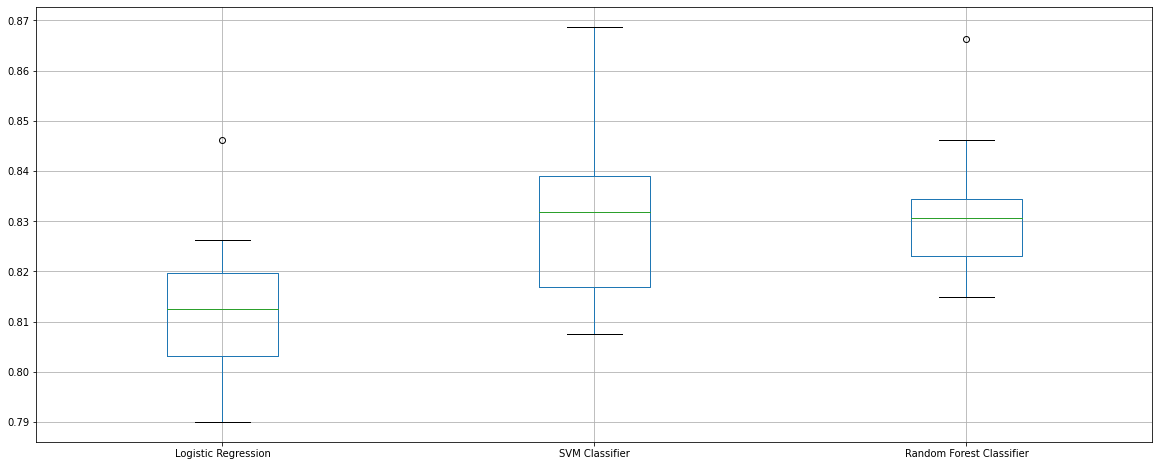

In [75]:
plt.figure(figsize = (20,8))
Accuracy.boxplot()

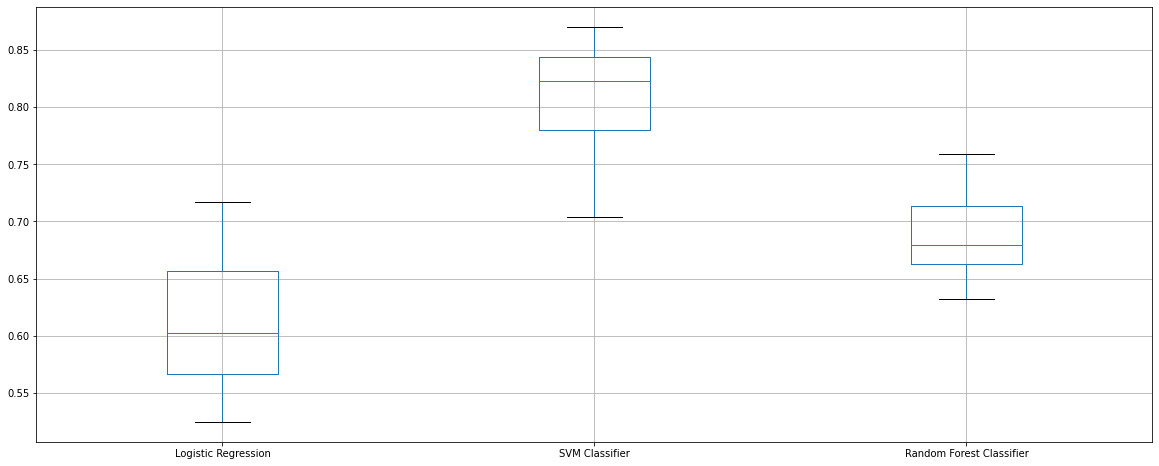

In [76]:
plt.figure(figsize = (20,8))
Precision.boxplot()

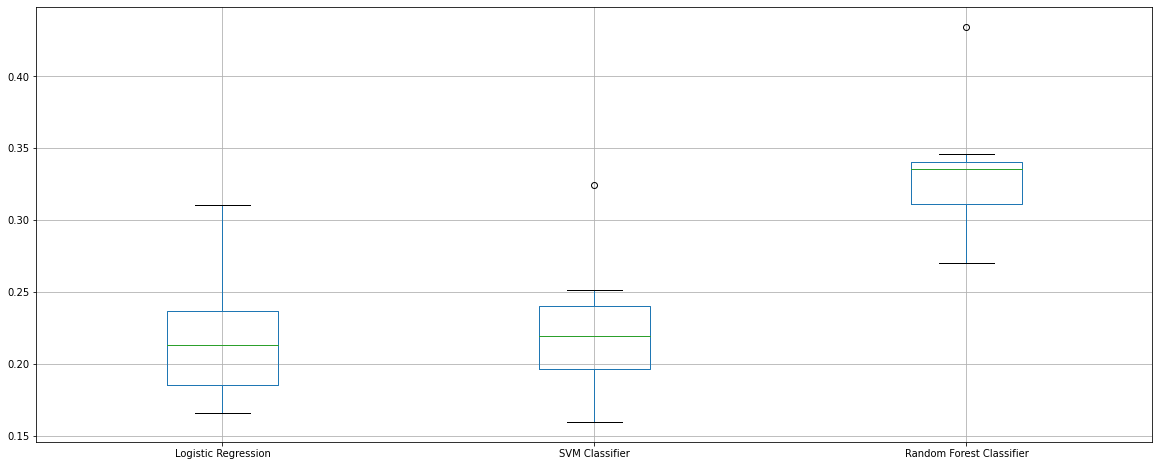

In [77]:
plt.figure(figsize = (20,8))
Recall.boxplot()

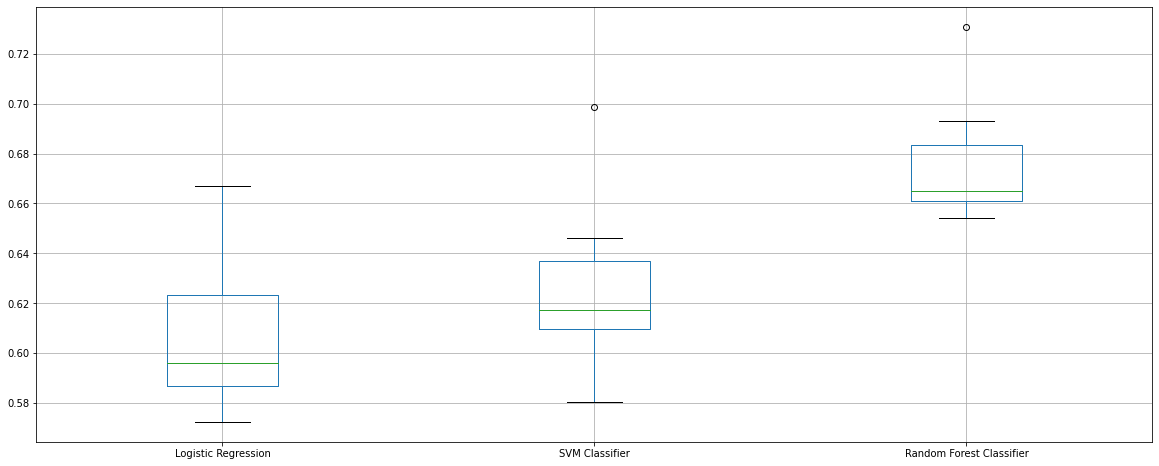

In [78]:
plt.figure(figsize = (20,8))
F1_Score.boxplot()

# ============================================================

### The accuracy of RFC and SVM are both high compared to Logistic Regression.
### Hence we will compare other metrics for comparision of models.
### In the given problem we have to find if the customer has "Exited" or not.
### If the customer is about to exit based on given parameters, we could give the customer some offers so thst              they don't exit the bank.
### We can tolerate "False Positives" i.e; we can give offers to the customers who will not exit the bank. But we can not tolerate "False Negatives".
### If the false negatives are more that means our model is predicting customers who actually exit as not-exit.
### Hence to reduce "False Negatives" we need to Select the model with Higher "RECALL" because 
### Recall = (True Positive/(True Positive+False Negative))


### From the above plots we can see that Random Forest classifier has better Recall than SVM. Hence we finalise 
## Random Forest Classifier as the final model.

# =============================================================

## Running test data for the finalised model

In [80]:
y_predict = best_rfc_model.predict(X_test)

In [82]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.71      0.34      0.46       408

    accuracy                           0.84      2001
   macro avg       0.78      0.65      0.68      2001
weighted avg       0.82      0.84      0.81      2001

